In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

In [2]:
# I am going to use two datasets one contains fake news and another contains real news.
df_fake = pd.read_csv("fake.csv")
df_true = pd.read_csv("true.csv")
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
df_fake['class']= 0
df_true['class'] = 1


In [5]:
df_fake.shape ,df_true.shape

((23481, 5), (21417, 5))

In [6]:
df_fake_manual_testing =df_fake.tail(10)
for i in range (23480 , 23470,-1):
    df_fake.drop([i], axis = 0 , inplace = True)


df_true_manual_testing =df_true.tail(10)
for i in range (21416 , 21406,-1):
    df_true.drop([i], axis = 0 , inplace = True)



In [7]:
df_fake.shape ,df_true.shape

((23471, 5), (21407, 5))

In [8]:
df_fake_manual_testing['class'] = 0
df_true_manual_testing['class'] = 1

C:\Users\mso-c\AppData\Local\Temp\ipykernel_19304\1523065411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing['class'] = 0
C:\Users\mso-c\AppData\Local\Temp\ipykernel_19304\1523065411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing['class'] = 1


In [9]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


In [10]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


In [11]:
data_merge = pd.concat([df_fake,df_true], axis = 0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [12]:
data_merge.shape

(44878, 5)

In [13]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [14]:
data = data_merge.drop(['title','subject','date'] ,axis = 1)

In [15]:
data.isnull().sum()

text     0
class    0
dtype: int64

In [16]:
data = data.sample(frac= 1 )

In [17]:
data.head()

,text,class
899,WASHINGTON (Reuters) - President Donald Trump ...,1
8030,The billionaire class is getting very scared o...,0
5994,With Donald Trump s clear and obvious racism o...,0
4103,WASHINGTON (Reuters) - The U.S. House of Repre...,1
11955,"DENPASAR, Indonesia (Reuters) - Indonesian pol...",1


In [18]:
data.reset_index(inplace = True)
data.drop(['index'],axis =1 , inplace= True)

In [19]:
data.columns

Index(['text', 'class'], dtype='object')

In [20]:
data.head()

,text,class
0,WASHINGTON (Reuters) - President Donald Trump ...,1
1,The billionaire class is getting very scared o...,0
2,With Donald Trump s clear and obvious racism o...,0
3,WASHINGTON (Reuters) - The U.S. House of Repre...,1
4,"DENPASAR, Indonesia (Reuters) - Indonesian pol...",1


In [21]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text= re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www.\.\S+','',text)
    text = re.sub('<,"?>+','',text)
    text = re.sub('[%s]'%re.escape(string.punctuation), '',text)
    text = re.sub('\n','',text)
    text= re.sub('\w*\d\w*','',text)
    return text

In [48]:
data['text'] = data['text'].apply(wordopt)
data.head()

,text,class
0,washington reuters president donald trump ...,1
1,the billionaire class is getting very scared o...,0
2,with donald trump s clear and obvious racism o...,0
3,washington reuters the u s house of repre...,1
4,denpasar indonesia reuters indonesian pol...,1


class
0    23471
1    21407
Name: text, dtype: int64


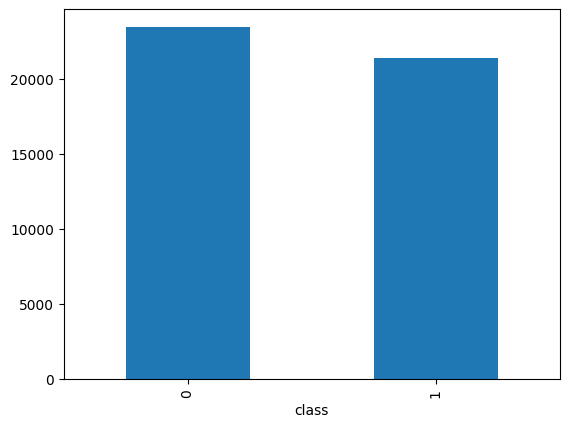

In [71]:
# How many fake and real articles?
print(data.groupby(['class'])['text'].count())
data.groupby(['class'])['text'].count().plot(kind="bar")
plt.show()

In [23]:
x = data['text']
y = data['class']

In [49]:
#Split the Data
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25)

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)


In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xv_train , y_train )

LogisticRegression()

In [52]:
predict_lr = lr.predict(xv_test)

In [53]:
lr.score(xv_test, y_test)

0.9862745098039216

In [54]:
print(classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5924
           1       0.98      0.99      0.99      5296

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [55]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(xv_train, y_train)

DecisionTreeClassifier()

In [56]:
predict_dt = dt.predict(xv_test )

In [57]:
dt.score(xv_test , y_test)

0.9964349376114082

In [58]:
print(classification_report(y_test , predict_dt))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5924
           1       1.00      1.00      1.00      5296

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=0)
gb.fit(xv_train , y_train)

GradientBoostingClassifier(random_state=0)

In [61]:

predict_gb = gb.predict(xv_test)

In [62]:
gb.score(xv_test , y_test)

0.9957219251336898

In [63]:
print(classification_report(y_test ,predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5924
           1       0.99      1.00      1.00      5296

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



In [64]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(xv_train ,y_train )

RandomForestClassifier()

In [65]:
predict_rf = rf.predict(xv_test)


In [66]:
rf.score(xv_test , y_test)


0.9908199643493761

In [67]:
print(classification_report(y_test, predict_rf))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5924
           1       0.99      0.99      0.99      5296

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



In [68]:
def output_label(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "It's a Real News"

def manual_testing(news):
    testing_news = {'text': [news]}
    new_df_test = pd.DataFrame(testing_news)
    new_df_test["text"] = new_df_test["text"].apply(wordopt)
    new_x_test = new_df_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    predict_lr = lr.predict(new_xv_test)
    predict_dt = dt.predict(new_xv_test)
    predict_gb = gb.predict(new_xv_test)
    predict_rf = rf.predict(new_xv_test)

    return print('\n\nLinear Regression Prediction: {}\nDecision Tree Prediction: {}\nGradient Boosting Prediction: {}\nRandom Forest Prediction: {}'.format(output_label(predict_lr[0]), output_label(predict_gb[0]), output_label(predict_rf[0]), output_label(predict_dt[0])))




In [70]:
news = str(input("Enter a News Article"))
manual_testing(news)



Linear Regression Prediction: It's a Real News
Decision Tree Prediction: It's a Real News
Gradient Boosting Prediction: It's a Real News
Random Forest Prediction: It's a Real News
